In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [34]:
start = '2010-01-01'
end = '2026-01-28'
stock = "GOLD"
data = yf.download(stock,start,end)


/tmp/ipython-input-2004176277.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [35]:
data.reset_index(inplace= True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOLD,GOLD,GOLD,GOLD,GOLD
0,2014-03-17,4.752068,4.891414,4.462656,4.462656,68200
1,2014-03-18,5.091500,5.323744,4.734202,4.752067,135600
2,2014-03-19,5.002175,5.145094,4.948581,5.055770,25600
3,2014-03-20,5.002175,5.002175,4.931073,5.002175,8200
4,2014-03-21,4.730629,4.966446,4.644877,4.966446,10600
...,...,...,...,...,...,...
2980,2026-01-21,42.669998,43.040001,40.900002,42.419998,541300
2981,2026-01-22,43.849998,44.299999,42.820000,42.869999,495400
2982,2026-01-23,43.110001,44.310001,42.610001,44.000000,520900


In [36]:
data.tail(10)

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOLD,GOLD,GOLD,GOLD,GOLD
2975,2026-01-13,41.680000,43.490002,41.096001,43.279999,797300
2976,2026-01-14,39.820000,42.500000,39.080002,42.080002,983900
2977,2026-01-15,40.090000,40.439999,38.630001,39.450001,453200
2978,2026-01-16,41.910000,42.294998,40.590000,41.099998,643700
2979,2026-01-20,42.139999,43.278999,42.000000,42.480000,636700
2980,2026-01-21,42.669998,43.040001,40.900002,42.419998,541300
2981,2026-01-22,43.849998,44.299999,42.820000,42.869999,495400
2982,2026-01-23,43.110001,44.310001,42.610001,44.000000,520900
2983,2026-01-26,44.099998,44.473000,42.700001,44.000000,858300


In [37]:
data.isnull().sum()

,,0
Price,Ticker,
Date,,0
Close,GOLD,0
High,GOLD,0
Low,GOLD,0
Open,GOLD,0
Volume,GOLD,0


In [38]:
data.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOLD,GOLD,GOLD,GOLD,GOLD
count,2985,2985.000000,2985.000000,2985.000000,2985.000000,2.985000e+03
mean,2020-02-17 07:36:50.653266432,15.017455,15.322566,14.710244,15.024731,1.389100e+05
min,2014-03-17 00:00:00,2.977752,3.045653,2.833606,2.997098,0.000000e+00
25%,2017-03-02 00:00:00,4.881996,4.966446,4.798543,4.880099,1.860000e+04
50%,2020-02-19 00:00:00,7.079084,7.208330,6.942765,7.079083,7.380000e+04
75%,2023-02-03 00:00:00,26.582544,27.069681,26.089804,26.602042,1.931000e+05
max,2026-01-27 00:00:00,51.150002,52.924000,44.460496,45.192518,2.739600e+06
std,NaN,11.902587,12.138791,11.654565,11.901614,1.861628e+05


In [39]:
data.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'GOLD'),
            (  'High', 'GOLD'),
            (   'Low', 'GOLD'),
            (  'Open', 'GOLD'),
            ('Volume', 'GOLD')],
           names=['Price', 'Ticker'])

In [40]:
moving_average = data.Close.rolling(100).mean()


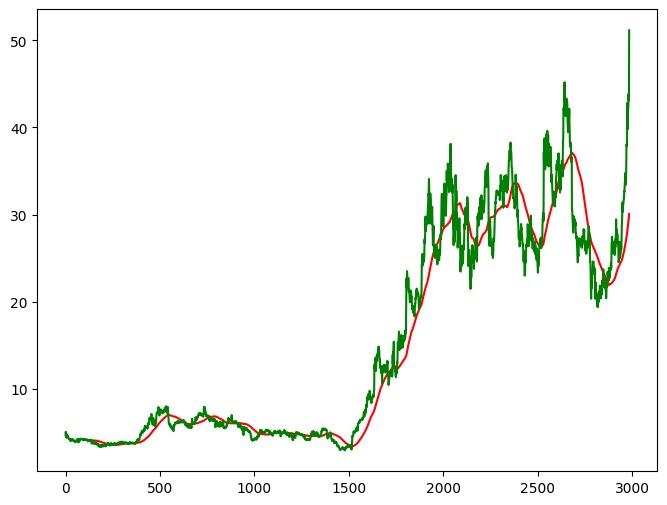

In [41]:
plt.figure(figsize=(8,6))
plt.plot(moving_average,'r')
plt.plot(data.Close,'g')

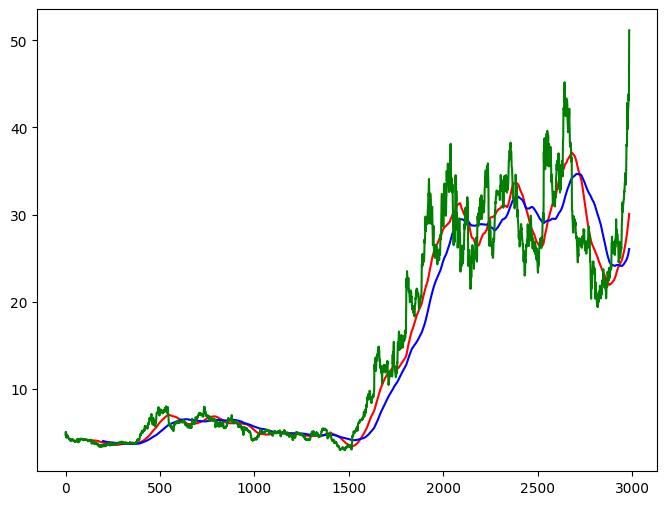

In [42]:
moving1_average = data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(moving_average,'r')
plt.plot(moving1_average,'b')
plt.plot(data.Close,'g')

In [43]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [44]:
data_train.shape[0]
data_test.shape[0]

597

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [46]:
data_train_scale = scaler.fit_transform(data_train)

In [47]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [48]:
x,y = np.array(x),np.array(y)

In [49]:
from keras.layers import Dense, Dropout, LSTM # Long Short-Term Memory
from keras.models import Sequential

In [50]:
from keras.layers import Dense, Dropout, LSTM # Long Short-Term Memory
from keras.models import Sequential
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model .add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [52]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 30s 305ms/step - loss: 0.0649
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 291ms/step - loss: 0.0091
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 289ms/step - loss: 0.0072
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 302ms/step - loss: 0.0058
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 40s 287ms/step - loss: 0.0061
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 42s 305ms/step - loss: 0.0054
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 310ms/step - loss: 0.0054
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 311ms/step - loss: 0.0044
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 40s 295ms/step - loss: 0.0052
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 310ms/step - loss: 0.0050
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 312ms/step - loss: 0.0053
Epoch 12/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 310ms/step - loss: 0.0047
Epoch 13/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 309ms/step - loss: 0.0046
Epoch 14/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 27s 373ms/step - loss: 0.0045
Epoch 15/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [53]:
history = model.fit(
    x, y,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)



Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 323ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 340ms/step - loss: 0.0011 - val_loss: 0.0074
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 314ms/step - loss: 9.7513e-04 - val_loss: 0.0035
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 342ms/step - loss: 9.3112e-04 - val_loss: 0.0047
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 313ms/step - loss: 0.0011 - val_loss: 0.0052
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 336ms/step - loss: 9.7786e-04 - val_loss: 0.0048
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 312ms/step - loss: 9.5971e-04 - val_loss: 0.0049
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 310ms/step - loss: 0.0013 - val_loss: 0.0053
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 334ms/step - loss: 8.7206e-04 - val_loss: 0.0023
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 18s 314ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 341ms/step - loss: 0.0012 - val_loss: 0.0031
Epoch 12/50
58/58 ━━━

In [54]:
# Prepare test input sequences
past_100 = data_train.tail(100)
final_df = pd.concat([past_100, data_test], ignore_index=True)

input_data = scaler.transform(final_df)  # use transform, not fit_transform

x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

# Predict (scaled)
y_pred_scaled = model.predict(x_test)

# Inverse scale back to price
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test.reshape(-1,1))


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step


In [55]:
# Prepare test input sequences
past_100 = data_train.tail(100)
final_df = pd.concat([past_100, data_test], ignore_index=True)

input_data = scaler.transform(final_df)  # use transform, not fit_transform

x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

# Predict (scaled)
y_pred_scaled = model.predict(x_test)

# Inverse scale back to price
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test.reshape(-1,1))


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step


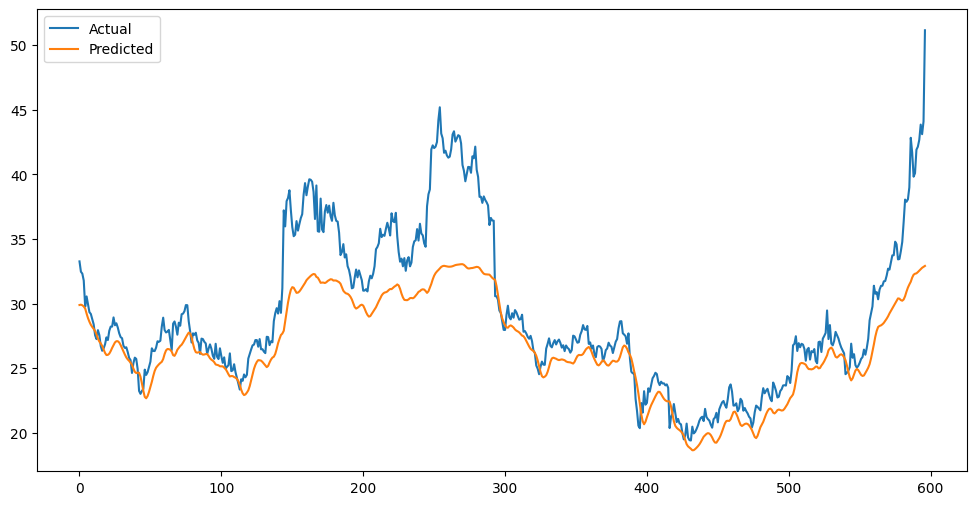

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_true, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.show()


In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print("RMSE:", rmse)
print("MAE :", mae)


RMSE: 3.7281438499359085
MAE : 2.642789767215799


In [58]:
import numpy as np

lookback = 100

# 1) Take last 100 CLOSE prices from your full dataframe
last_100_close = data['Close'].tail(lookback).values.reshape(-1, 1)

# 2) Scale using the SAME scaler you used in training (scaler from your notebook)
last_100_scaled = scaler.transform(last_100_close)

# 3) Reshape to LSTM input: (1, 100, 1)
x_input = last_100_scaled.reshape(1, lookback, 1)

# 4) Predict (scaled)
pred_scaled = model.predict(x_input)

# 5) Inverse transform to actual price
pred_price = scaler.inverse_transform(pred_scaled)[0, 0]

print("Predicted next trading-day Close:", pred_price)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted next trading-day Close: 33.003567


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [59]:
model.save("gold_lstm_model.keras")
